In [38]:
import pandas as pd

## 예제 10-10 주가 정보 가져와서 확인하기

In [39]:
import matplotlib.pyplot as plt

In [40]:
%matplotlib inline

!conda install -c anaconda pandas-datareader 

!pip install pandas-datareader 

In [41]:
 # !pip install pandas-datareader

In [42]:
from pandas_datareader import data

In [43]:
import datetime

In [44]:
start = datetime.datetime(2014, 2, 19)
start

datetime.datetime(2014, 2, 19, 0, 0)

In [45]:
end = datetime.datetime(2018, 3, 4)
end

datetime.datetime(2018, 3, 4, 0, 0)

In [46]:
f = data.DataReader("068270.KS", "yahoo", start, end)

In [47]:
f.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-02-19,39418.800781,35952.500000,36436.199219,38572.398438,3758157.0,38572.398438
2014-02-20,38935.101562,37202.000000,38814.199219,37484.101562,1514137.0,37484.101562
2014-02-21,38532.101562,37322.898438,37806.601562,37927.500000,850284.0,37927.500000
2014-02-24,39136.699219,37927.500000,38209.601562,38008.101562,946798.0,38008.101562
2014-02-25,38532.101562,37605.101562,38330.601562,38209.601562,536812.0,38209.601562


In [48]:
f.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-23,301120.0,286648.0,288515.0,296919.0,1045846.0,296919.0
2018-02-26,306256.0,299253.0,299720.0,304855.0,885860.0,304855.0
2018-02-27,330999.0,308590.0,311858.0,327731.0,2246829.0,327731.0
2018-02-28,340336.0,319328.0,319795.0,329598.0,2586064.0,329598.0
2018-03-02,347339.0,327731.0,329598.0,347339.0,2103542.0,347339.0


In [49]:
f.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

#### seaborn 을 이용하면 실제 스타일이 바뀐다

!pip install seaborn

In [50]:
import seaborn

seaborn.set()

<AxesSubplot:xlabel='Date'>

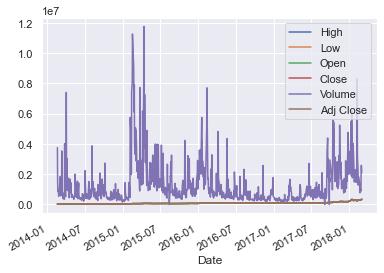

In [51]:
f.plot()

In [52]:
f.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [53]:
f.index

DatetimeIndex(['2014-02-19', '2014-02-20', '2014-02-21', '2014-02-24',
               '2014-02-25', '2014-02-26', '2014-02-27', '2014-02-28',
               '2014-03-03', '2014-03-04',
               ...
               '2018-02-14', '2018-02-19', '2018-02-20', '2018-02-21',
               '2018-02-22', '2018-02-23', '2018-02-26', '2018-02-27',
               '2018-02-28', '2018-03-02'],
              dtype='datetime64[ns]', name='Date', length=987, freq=None)

<AxesSubplot:xlabel='Date'>

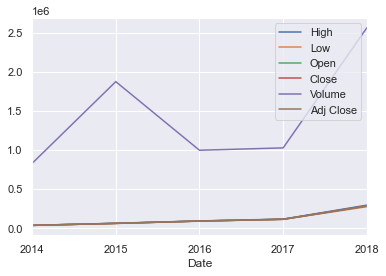

In [54]:
f.resample('BA').mean().plot()

In [55]:
f.resample('BA').mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,36239.745415,35092.578483,35626.362080,35548.829042,8.272947e+05,35548.829042
2015-12-31,62806.593475,60052.977880,61376.342173,61229.877408,1.872413e+06,61229.877408
2016-12-30,92434.991171,89714.481739,91075.139450,90843.840003,9.957034e+05,90843.840003
2017-12-29,115685.037690,112074.451850,113819.444495,113758.506897,1.025958e+06,113758.506897
2018-12-31,294313.725000,274220.350000,282434.600000,284927.575000,2.561097e+06,284927.575000


In [56]:
f.loc['2014-12-30']

High          32883.300781
Low           32417.699219
Open          32798.601562
Close         32883.300781
Volume       157983.000000
Adj Close     32883.300781
Name: 2014-12-30 00:00:00, dtype: float64

In [57]:
try :
    f.loc['2014-12-31']
except Exception as e :
    print(e)

'2014-12-31'


In [58]:
f.asfreq('BA', method='ffill').head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,32883.300781,32417.699219,32798.601562,32883.300781,157983.0,32883.300781
2015-12-31,74103.703125,72534.500000,74103.703125,73667.796875,1016498.0,73667.796875
2016-12-30,98588.500000,96208.398438,96849.203125,98313.796875,540847.0,98313.796875
2017-12-29,210738.000000,203641.000000,207190.000000,206443.000000,1991360.0,206443.000000


<AxesSubplot:xlabel='Date'>

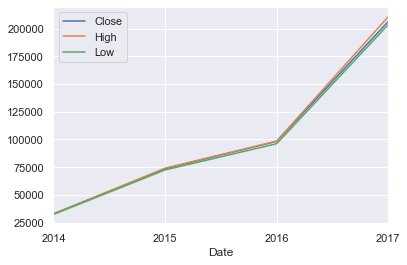

In [59]:
f.asfreq('BA',method='ffill')[['Close', 'High', 'Low']].plot()

<AxesSubplot:xlabel='Date'>

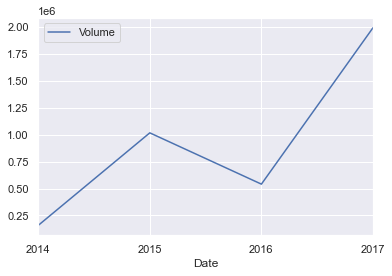

In [60]:
f.asfreq('BA',method='ffill')[['Volume']].plot()

### 이동평균 구하기

In [61]:
md20 = f['Close'].rolling(window=20).mean()

In [62]:
md20.head(20)

Date
2014-02-19             NaN
2014-02-20             NaN
2014-02-21             NaN
2014-02-24             NaN
2014-02-25             NaN
2014-02-26             NaN
2014-02-27             NaN
2014-02-28             NaN
2014-03-03             NaN
2014-03-04             NaN
2014-03-05             NaN
2014-03-06             NaN
2014-03-07             NaN
2014-03-10             NaN
2014-03-11             NaN
2014-03-12             NaN
2014-03-13             NaN
2014-03-14             NaN
2014-03-17             NaN
2014-03-18    36970.235547
Name: Close, dtype: float64

#### 이동평균을 구하기 

In [63]:
md60 = f['Close'].rolling(window=60).mean()

In [64]:
md120 = f['Close'].rolling(window=120).mean()

#### 기존 데이터에 넣기

In [65]:
f.insert(len(f.columns), "MD20", md20)

In [66]:
f.head(3)

,High,Low,Open,Close,Volume,Adj Close,MD20
Date,,,,,,,
2014-02-19,39418.800781,35952.500000,36436.199219,38572.398438,3758157.0,38572.398438,NaN
2014-02-20,38935.101562,37202.000000,38814.199219,37484.101562,1514137.0,37484.101562,NaN
2014-02-21,38532.101562,37322.898438,37806.601562,37927.500000,850284.0,37927.500000,NaN


In [67]:
f.tail(3)

,High,Low,Open,Close,Volume,Adj Close,MD20
Date,,,,,,,
2018-02-27,330999.0,308590.0,311858.0,327731.0,2246829.0,327731.0,284659.15
2018-02-28,340336.0,319328.0,319795.0,329598.0,2586064.0,329598.0,285812.25
2018-03-02,347339.0,327731.0,329598.0,347339.0,2103542.0,347339.0,287931.75


In [68]:
f.insert(len(f.columns), "MD60", md60)

In [69]:
f.insert(len(f.columns), "MD120", md120)

###  평균 이동선 그래프 그리기

<AxesSubplot:xlabel='Date'>

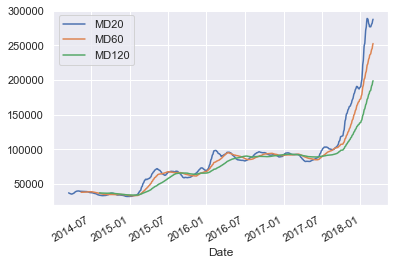

In [70]:
f[['MD20','MD60','MD120']].plot()